In [341]:
%matplotlib inline

from pprint import pprint
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression

import json
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns

from scipy.stats import norm

In [356]:
root = r'/Users/kershad1/Downloads/popularity-raw/'
twitter_geo = root+r'twitter/geo'
twitter_mention = root+r'twitter/mention'
reddit_comment = root+r'reddit/comment'
reddit_traversal = root+r'reddit/trvaersal'
data_sets = [twitter_geo, twitter_mention, reddit_comment, reddit_traversal]

In [373]:
df = pd.DataFrame()
with open(data_sets[0]) as data_file:
    for l in data_file:
        data = json.loads(l)
        df = pd.concat((df, pd.read_json(data)))

In [374]:
word_popularity = df.pivot(index='word', columns='timedelta', values='popularity')

In [375]:
matrix = word_popularity.fillna(0).reset_index()
x_cols = [x for x in matrix.columns[1:] if x > 0]

In [376]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

range_n_clusters = range(2,100)

siloet_scor = {}
sample_silhouette_values_dict = []
for n_clusters in range_n_clusters:
    print n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(matrix[x_cols])
    silhouette_avg = silhouette_score(matrix[x_cols], cluster_labels)
    siloet_scor[n_clusters] = silhouette_avg
    sample_silhouette_values_dict.append(silhouette_samples(matrix[x_cols], cluster_labels))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [377]:
silhouette_df = pd.DataFrame(siloet_scor, index=["silhouette_score"]).T

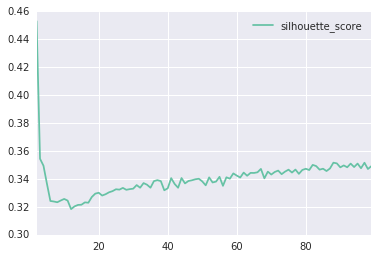

In [378]:
silhouette_df.plot()

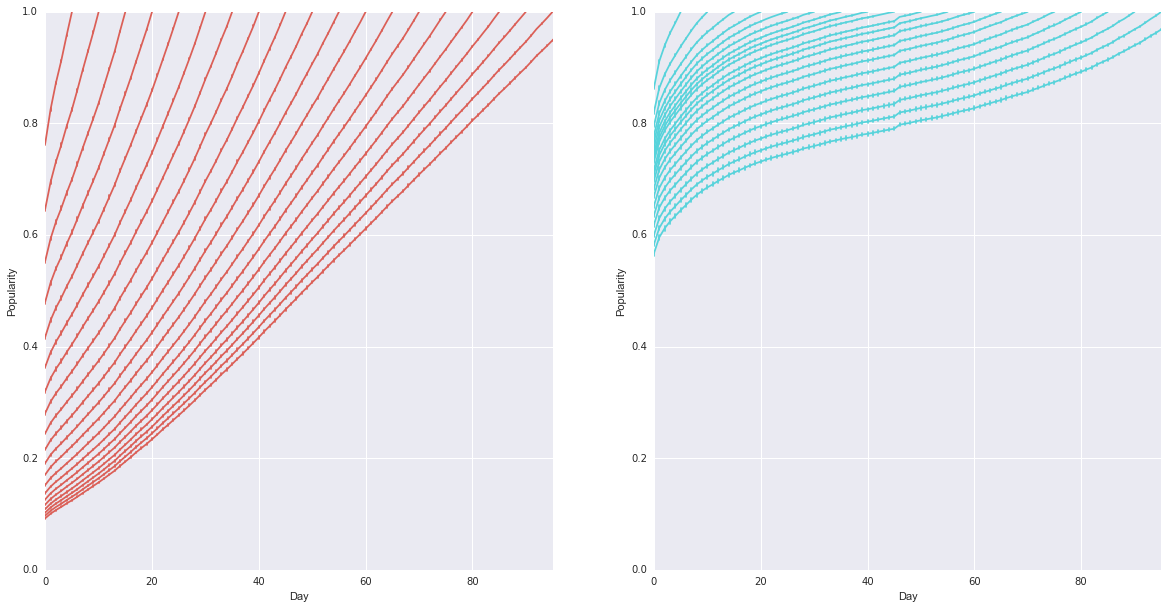

In [360]:
from sklearn.cluster import KMeans

# cluster = KMeans(n_clusters=silhouette_df["silhouette_score"].argmax())
cluster = KMeans(n_clusters=2)

matrix['cluster'] = cluster.fit_predict(matrix[x_cols])
matrix.cluster.value_counts()

m = matrix[["word","cluster"]+[z for z in set(df["timedelta"].values) if z > 0]].set_index(["word"])
col = sns.color_palette("hls", len(set(m["cluster"].values)))
fig = plt.figure(figsize=(20,10))    
for c in set(m["cluster"].values):
    ax = fig.add_subplot(1, 2, c+1)
    for r in [z for z in set(df["timedelta"].values) if z > 0]:
        tmp_7 = pd.DataFrame([json.loads(x)["popularity"] for x in df[(df["word"].isin( m[(m["cluster"] == c)].index) & (df["timedelta"] == r))]["popularity_json"].values])
        
        sns.tsplot(tmp_7.T.set_index(pd.to_numeric(tmp_7.T.index)).sort_index().T.values, color=col[c], ax=ax, err_style="ci_bars")
    ax.set_ylabel("Popularity")
    ax.set_xlabel("Day")

    ax.set_ylim(0,1)
    ax.set_xlim(0,)

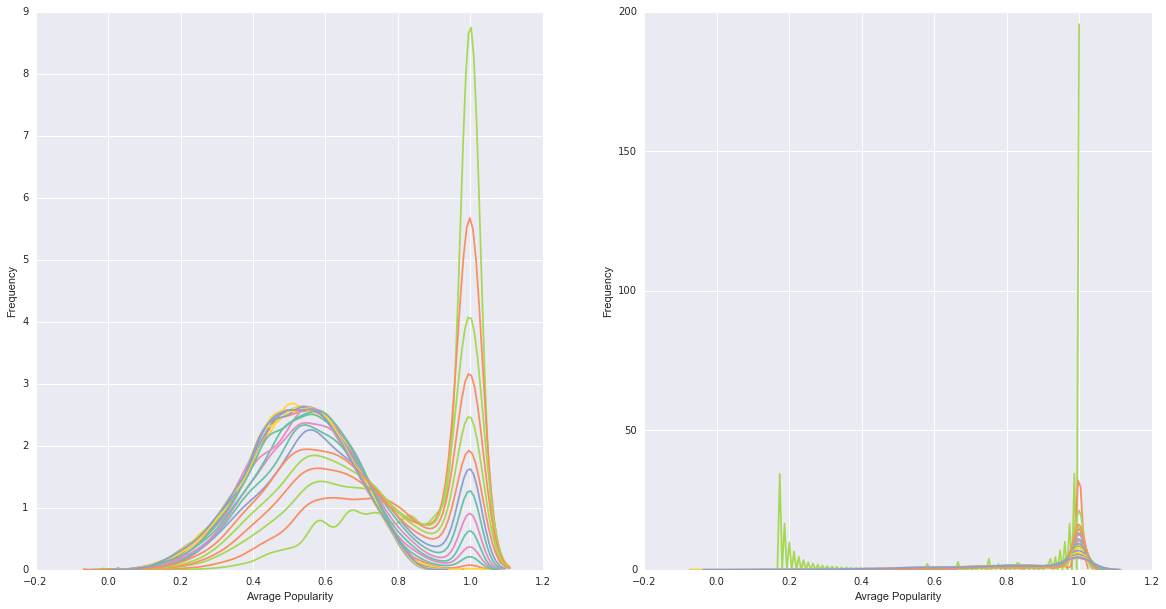

In [361]:
col = sns.color_palette("hls", len(set(m["cluster"].values)))
fig = plt.figure(figsize=(20,10))    
for c in set(m["cluster"].values):
    ax = fig.add_subplot(1, 2, c+1)
    for r in set(df["timedelta"].values):
        sns.distplot(df[(df["word"].isin( m[(m["cluster"] == c)].index) & (df["timedelta"] == r))]["popularity"].values, ax=ax, hist=False)
        
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Avrage Popularity")

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([1, len(X) + (n_clusters + 1) * 10])
    
    #determing the clusters for this number of clusters. 
    cluster = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_lables = cluster.fit_predict(matrix[x_cols])

    silhouette_avg = silhouette_score(matrix[x_cols], cluster_lables)
    
    sample_silhouette_values silhouette_samples(matrix[x_cols], cluster_lables)
    
    y_lower = 10
    from i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.spahe[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arage(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha = 0.7)
        
        ax1.text(10.05, y_lower + 0.5 * size_cluster_i, str(i))
        #This is where the plot goes
        
        y_lower = y_upper + 10

In [363]:
pd.DataFrame({"name":["danie"]}).T

,0
name,danie
